Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
# feel free to add more if you need

Read Data

In [2]:
# load data
data_raw = pd.read_csv('~/Desktop/Fall 2024/GenBus 656/Assignment 3/Data/DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('~/Desktop/Fall 2024/GenBus 656/Assignment 3/Data/DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

In [3]:
# a full description of the variables
data_description

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [4]:
# a full description of the dataset
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)? 
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [5]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [6]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [7]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City', 
               'Customer Country', 'Customer Email', 
               'Customer Fname', 'Customer Lname', 
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [8]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [9]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [10]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id', 
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude', 
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [11]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Check for duplicate observations

In [12]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [13]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [14]:
data_raw.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Customer Segment                 0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

Plot a correlation heatmap

<AxesSubplot:>

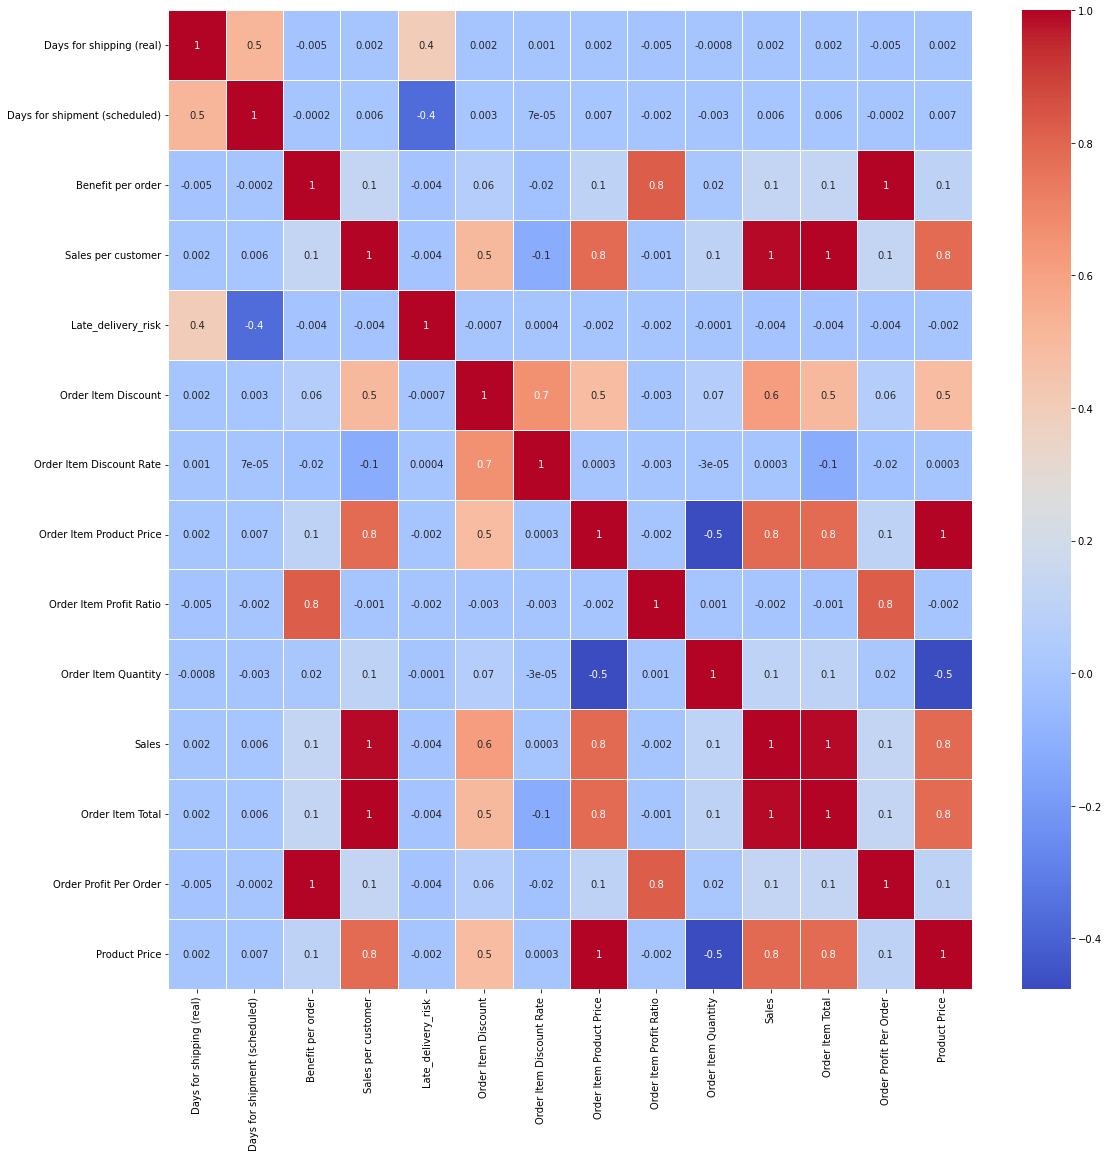

In [15]:
fig, ax = plt.subplots(figsize = (18, 18))   
sns.heatmap(data_raw.corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Assignment:

Consider company A is an insurer that sells logistics delay insurance policies to firms that offer supply chain management and you are the chief pricing actuary of company A. Your task is to properly price the premiums for the logistics delay insurance using the provided data (data for this assignment). 

Below is a brief description of the logistics delay insurance product sold by company A:
1) The policy can only be purchased along with the commodity transaction (i.e. one cannot purchase the commodity first and then purchase a logistics delay insurance).
2) The payout for logistics delay insurance depends solely on whether the delivery is made on time, not on the specific duration of the delay (i.e. the payout stays the same regardless the delivery is late for 1 day or 10 days).
3) For an active policy, the policyholder may file a claim when a late delivery occurs.

Below is a brief background on how actuaries price a product:
1) Actuaries make assumptions on various things including the underlying data distribution, policyholders' behaviors, etc.
2) Actuaries use the "Equivalence Principal" that is: a policyholder's premium is set to be equal the customer's expected loss.
3) Actuaries need to consider a profit loading and a fixed expense loading on top of the break-even premium mentioned in (2) in order to keep the business running.
4) Actuaries need to interprete the pricing model to the Department of Insurance (DOI) to get an approval for deployment of the product.

Example:

Suppose there are 10 auto policyholders $X_1, \ldots, X_{10}$ each with probility of 0.05 of hitting an accident. If an accident occurs, the insurer pays $\$100$ to the policyholder. There is a fixed expense of $\$2$ regardless an accident of not. The insurer is targeting a $10\%$ profit load on top of all cost and expenses. Now, suppose there is exact $1$ policyholder has an accident. Then in this simple scenario, the premium for each policyholder is the same since they all have the same probability of hitting an accident, namely $\mathbb{P}(\text{Accident} | X_i) = 0.05, i = 1, \ldots, 10$. Then the premium for each policyholder is $0.05 \times \$100 + 0.95 \times \$0 = 5$. So, if the insurer collects $\$5 \times 10 + \$2 \times 10 = \$70$, but the loss is $\$100$ since one policyholder has an accident. Then the insurer is insolvent. Therefore, there are times that you need to make some suitable adjustments to achieve a target profit load.

In this assignment: 
1) Company A pays $\$100$ per claim filed after a late delivery.
2) You will consider a $5\%$ profit loading and a $\$10$ fixed expense on a policy basis. 
3) You will need to justify why the assumptions you made are reasonable.
4) You will NOT be considering the interpretability of your model, but the features used in the model should be interpretable (i.e. tractable engineered features) and in fact, you are expected to perform some feature engineering before modeling. 
5) You are free to use any models but preferrably the ones related to Module 7 and be careful when you choose a model (i.e. pick the model that is appropriate for this task and thay could potentially yield positive economoic results).
6) You will finalize a pricing allgorithm then test if the aggregated premium collected using your algorithm is sufficient to cover the loss and fixed expense and of course earns you $5\%$ overall profit load on top of that on the test set. 
7) Conclude your findings in (6.) and discuss what could be the potential reasons for observing your findings in (6.).

----------------------------------------------------------------------------------------------------------------------------------------------------
Things to look at in grading:
1) Assumptions on the data (i.e. need to assume that the observations in this dataset actually purchased the insurance).
2) The $5\%$ profit loading is on top of equivalence principal and fixed expense loading.
3) The engineered features should have some meaning.
4) Standardization of data for running SVM
5) In fact, all three models related to Module 7 are distribution-free. Specifically, KNN suffers in high dimensions; SVM performs well in high dimension; The greedy nature for the first split in tree gives tree models very high variance when not equipped with ensemble methods. Whatever model used, student need to come up with conditional probabilities to price each individual. A simple aggregated level prediction is NOT valid at least for the purposes of this assignment (i.e. each policyholder pays the same premium). 
6) The reason that even the adjusted premium does not earn profit could be that there is just simply too many claims file and the pool is not large enough for the empirical estimation of expected loss to be arbitrarily close to the true expected loss (i.e. the sample size is not large enough for the finite sample risk bound to hold for some $\epsilon > 0, \delta \in (0, \frac{1}{2})$ s.t. $\mathbb{P}(|\hat{\mathbb{E}} - \mathbb{E}| > \epsilon) < \delta$). This explains why the essense of insurance is risk pooling. Another possible reason is that the pricing algorithm we come up is not robust that is to say the test set may just happen to contain too many tail observations, this explains why the DOI requires filing pressure test for pricing algorithms to ensure the insurer does not go insolvent with high probability even under extreme cases. Other reasonable explanations are also fine.
7) Feel free to add more.

Solution:

1. Bivariate Analysis

In [16]:
# Type vs Delivery Risk
data_raw.groupby(['Type', 'Late_delivery_risk'])['Type'].count()

Type      Late_delivery_risk
CASH      0                      8507
          1                     11109
DEBIT     0                     29646
          1                     39649
PAYMENT   0                     17721
          1                     24004
TRANSFER  0                     25668
          1                     24215
Name: Type, dtype: int64

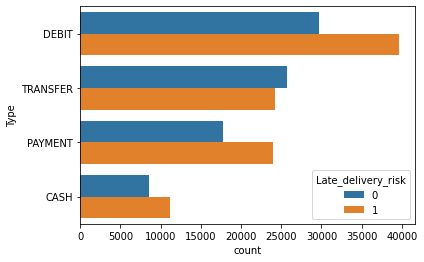

In [17]:
ax = sns.countplot(y = 'Type',
                   hue = 'Late_delivery_risk',
                   data = data_raw,
                   order = data_raw['Type'].value_counts(ascending = False).index)
plt.show()

# Notice that for each type of payment, the risk of delay is greater, except for the transfer payment type

In [18]:
# Delivery Status vs Delivery Risk
data_raw.groupby(['Delivery Status', 'Late_delivery_risk'])['Type'].count()

Delivery Status    Late_delivery_risk
Advance shipping   0                     41592
Late delivery      1                     98977
Shipping canceled  0                      7754
Shipping on time   0                     32196
Name: Type, dtype: int64

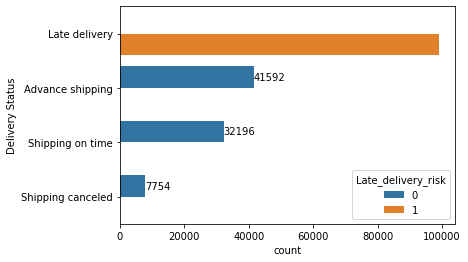

In [19]:
ax = sns.countplot(y = 'Delivery Status',
                   hue = 'Late_delivery_risk',
                   data = data_raw,
                   order = data_raw['Delivery Status'].value_counts(ascending = False).index)

abs_values = data_raw['Delivery Status'].value_counts(ascending = False).values

ax.bar_label(container = ax.containers[0], labels = abs_values)
plt.show()

# Notice that the risk of delay only exists in Late delivery status, while other delivery statuses do not have a risk of accidents. 
# So we can just remove this feature, to avoid bias (late delivery status is definitely risky, and others are definitely not).

In [20]:
# Customer Segment vs Delivery Risk
data_raw.groupby(['Customer Segment', 'Late_delivery_risk'])['Type'].count()

Customer Segment  Late_delivery_risk
Consumer          0                     42256
                  1                     51248
Corporate         0                     24807
                  1                     29982
Home Office       0                     14479
                  1                     17747
Name: Type, dtype: int64

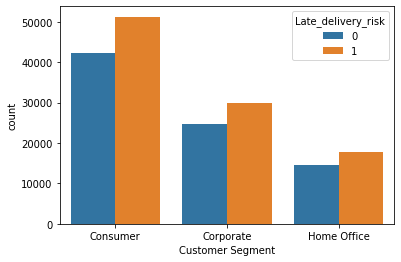

In [21]:
ax = sns.countplot(x = 'Customer Segment',
                   hue = 'Late_delivery_risk',
                   data = data_raw,
                   order = data_raw['Customer Segment'].value_counts(ascending=False).index)
plt.show()

# Notice that for each customer segment, each has a greater risk of delays. 
# Because each segment has almost the same proportion of risk, it is better for us to remove this feature

In [22]:
# Order Status vs Delivery Risk
data_raw.groupby(['Order Status', 'Late_delivery_risk'])['Type'].count()

Order Status     Late_delivery_risk
CANCELED         0                      3692
CLOSED           0                      8507
                 1                     11109
COMPLETE         0                     25292
                 1                     34199
ON_HOLD          0                      4354
                 1                      5450
PAYMENT_REVIEW   0                       811
                 1                      1082
PENDING          0                      8515
                 1                     11712
PENDING_PAYMENT  0                     16910
                 1                     22922
PROCESSING       0                      9399
                 1                     12503
SUSPECTED_FRAUD  0                      4062
Name: Type, dtype: int64

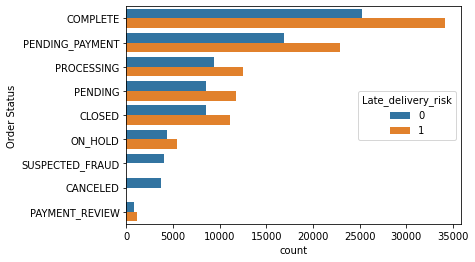

In [23]:
ax = sns.countplot(y = 'Order Status',
                   hue = 'Late_delivery_risk',
                   data = data_raw,
                   order = data_raw['Order Status'].value_counts(ascending=False).index)
plt.show()

# Notice that Order Status looks very diverse, because it is too diverse and spread, it is better to just delete this feature since it does not seem to give strong signal.

In [24]:
# Shipping Mode vs Delivery Risk
data_raw.groupby(['Shipping Mode', 'Late_delivery_risk'])['Type'].count()

Shipping Mode   Late_delivery_risk
First Class     0                      1301
                1                     26513
Same Day        0                      5283
                1                      4454
Second Class    0                      8229
                1                     26987
Standard Class  0                     66729
                1                     41023
Name: Type, dtype: int64

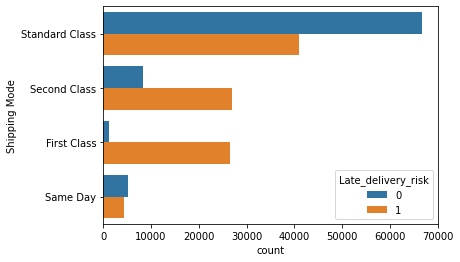

In [25]:
ax = sns.countplot(y = 'Shipping Mode',
                   hue = 'Late_delivery_risk',
                   data = data_raw,
                   order = data_raw['Shipping Mode'].value_counts(ascending=False).index);

plt.show()

# Notice that Standard Class and Same Day shipping modes have a lower risk of delays, while First Class and Second Class have a very high risk of delays

2. Feature Engineering

In [26]:
# Datetime
data_raw.select_dtypes(include=["object"])

,Type,Delivery Status,Customer Segment,order date (DateOrders),Order Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Consumer,1/31/2018 22:56,COMPLETE,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Consumer,1/13/2018 12:27,PENDING,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Consumer,1/13/2018 12:06,CLOSED,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Home Office,1/13/2018 11:45,COMPLETE,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Corporate,1/13/2018 11:24,PENDING_PAYMENT,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Home Office,1/16/2016 3:40,CLOSED,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Corporate,1/16/2016 1:34,COMPLETE,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Corporate,1/15/2016 21:00,PENDING,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Consumer,1/15/2016 20:18,PENDING_PAYMENT,1/18/2016 20:18,Standard Class


In [27]:
# Convert order date and shipping date features to datetime type
data_raw[["order date (DateOrders)", "shipping date (DateOrders)"]] = data_raw[["order date (DateOrders)", "shipping date (DateOrders)"]].apply(pd.to_datetime)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Customer Segment               180519 non-null  object        
 8   order date (DateOrders)        180519 non-null  datetime64[ns]
 9   Order Item Discount            180519 non-null  float64       
 10  Order Item Discount Rate       180519 non-null  float64       
 11  

In [28]:
data_raw.select_dtypes(include=["datetime64"])

,order date (DateOrders),shipping date (DateOrders)
0,2018-01-31 22:56:00,2018-02-03 22:56:00
1,2018-01-13 12:27:00,2018-01-18 12:27:00
2,2018-01-13 12:06:00,2018-01-17 12:06:00
3,2018-01-13 11:45:00,2018-01-16 11:45:00
4,2018-01-13 11:24:00,2018-01-15 11:24:00
...,...,...
180514,2016-01-16 03:40:00,2016-01-20 03:40:00
180515,2016-01-16 01:34:00,2016-01-19 01:34:00
180516,2016-01-15 21:00:00,2016-01-20 21:00:00
180517,2016-01-15 20:18:00,2016-01-18 20:18:00


In [29]:
# Difference in Days (Delivery - Order)

# Convert the columns to datetime format
data_raw['shipping date (DateOrders)'] = pd.to_datetime(data_raw['shipping date (DateOrders)'])
data_raw['order date (DateOrders)'] = pd.to_datetime(data_raw['order date (DateOrders)'])

data_raw['diff(hours)'] = (data_raw['shipping date (DateOrders)'] - data_raw['order date (DateOrders)']).astype('timedelta64[h]').astype(int)

data_raw['diff(hours)'].values

array([ 72, 120,  96, ..., 120,  72,  96])

In [30]:
# Day Of Week
data_raw['ship_day_of_week'] = data_raw['shipping date (DateOrders)'].dt.dayofweek
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Shipping Mode,diff(hours),ship_day_of_week
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,1,327.75,314.640015,91.250000,COMPLETE,327.75,2018-02-03 22:56:00,Standard Class,72,5
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,1,327.75,311.359985,-249.089996,PENDING,327.75,2018-01-18 12:27:00,Standard Class,120,3
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,1,327.75,309.720001,-247.779999,CLOSED,327.75,2018-01-17 12:06:00,Standard Class,96,2
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,1,327.75,304.809998,22.860001,COMPLETE,327.75,2018-01-16 11:45:00,Standard Class,72,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,1,327.75,298.250000,134.210007,PENDING_PAYMENT,327.75,2018-01-15 11:24:00,Standard Class,48,0


In [31]:
data_raw['order_day_of_week'] = data_raw['order date (DateOrders)'].dt.dayofweek
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Sales,Order Item Total,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Shipping Mode,diff(hours),ship_day_of_week,order_day_of_week
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,327.75,314.640015,91.250000,COMPLETE,327.75,2018-02-03 22:56:00,Standard Class,72,5,2
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,327.75,311.359985,-249.089996,PENDING,327.75,2018-01-18 12:27:00,Standard Class,120,3,5
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,327.75,309.720001,-247.779999,CLOSED,327.75,2018-01-17 12:06:00,Standard Class,96,2,5
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,327.75,304.809998,22.860001,COMPLETE,327.75,2018-01-16 11:45:00,Standard Class,72,1,5
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,327.75,298.250000,134.210007,PENDING_PAYMENT,327.75,2018-01-15 11:24:00,Standard Class,48,0,5


In [32]:
data_raw['ship_day_of_week_name'] = data_raw['ship_day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
data_raw['order_day_of_week_name'] = data_raw['order_day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [33]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Order Profit Per Order,Order Status,Product Price,shipping date (DateOrders),Shipping Mode,diff(hours),ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,91.250000,COMPLETE,327.75,2018-02-03 22:56:00,Standard Class,72,5,2,Saturday,Wednesday
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,-249.089996,PENDING,327.75,2018-01-18 12:27:00,Standard Class,120,3,5,Thursday,Saturday
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,-247.779999,CLOSED,327.75,2018-01-17 12:06:00,Standard Class,96,2,5,Wednesday,Saturday
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,22.860001,COMPLETE,327.75,2018-01-16 11:45:00,Standard Class,72,1,5,Tuesday,Saturday
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,134.210007,PENDING_PAYMENT,327.75,2018-01-15 11:24:00,Standard Class,48,0,5,Monday,Saturday


<AxesSubplot:xlabel='count', ylabel='order_day_of_week_name'>

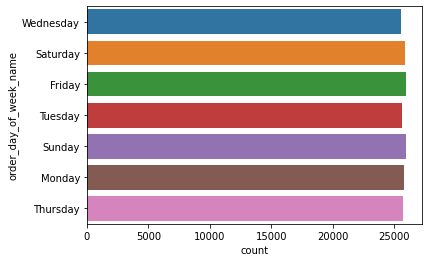

In [34]:
sns.countplot(y='order_day_of_week_name', data = data_raw)

In [35]:
# Hour
data_raw['ship_hour'] = data_raw['shipping date (DateOrders)'].dt.hour
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Order Status,Product Price,shipping date (DateOrders),Shipping Mode,diff(hours),ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,COMPLETE,327.75,2018-02-03 22:56:00,Standard Class,72,5,2,Saturday,Wednesday,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,PENDING,327.75,2018-01-18 12:27:00,Standard Class,120,3,5,Thursday,Saturday,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,CLOSED,327.75,2018-01-17 12:06:00,Standard Class,96,2,5,Wednesday,Saturday,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,COMPLETE,327.75,2018-01-16 11:45:00,Standard Class,72,1,5,Tuesday,Saturday,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,PENDING_PAYMENT,327.75,2018-01-15 11:24:00,Standard Class,48,0,5,Monday,Saturday,11


In [36]:
data_raw['order_hour'] = data_raw['order date (DateOrders)'].dt.hour
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Product Price,shipping date (DateOrders),Shipping Mode,diff(hours),ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,327.75,2018-02-03 22:56:00,Standard Class,72,5,2,Saturday,Wednesday,22,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,327.75,2018-01-18 12:27:00,Standard Class,120,3,5,Thursday,Saturday,12,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,327.75,2018-01-17 12:06:00,Standard Class,96,2,5,Wednesday,Saturday,12,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,327.75,2018-01-16 11:45:00,Standard Class,72,1,5,Tuesday,Saturday,11,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,327.75,2018-01-15 11:24:00,Standard Class,48,0,5,Monday,Saturday,11,11


<AxesSubplot:xlabel='count', ylabel='order_hour'>

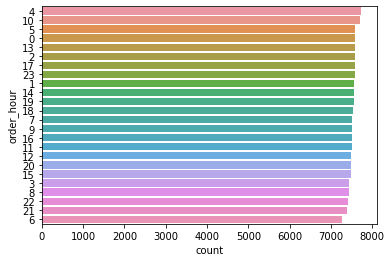

In [37]:
sns.countplot(y = 'order_hour', data = data_raw, order = data_raw['order_hour'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='ship_hour'>

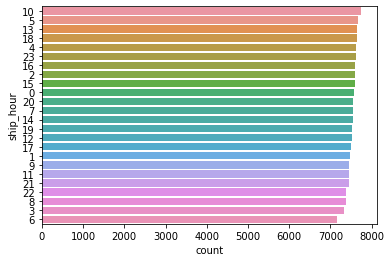

In [38]:
sns.countplot(y='ship_hour', data = data_raw, order = data_raw['ship_hour'].value_counts().index)

In [39]:
# Day
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

# ship daypart
data_raw['ship_daypart'] = data_raw['ship_hour'].apply(f)
# order daypart
data_raw['order_daypart'] = data_raw['order_hour'].apply(f)
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,Shipping Mode,diff(hours),ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour,order_hour,ship_daypart,order_daypart
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,Standard Class,72,5,2,Saturday,Wednesday,22,22,Night,Night
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,Standard Class,120,3,5,Thursday,Saturday,12,12,Morning,Morning
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,Standard Class,96,2,5,Wednesday,Saturday,12,12,Morning,Morning
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,Standard Class,72,1,5,Tuesday,Saturday,11,11,Morning,Morning
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,Standard Class,48,0,5,Monday,Saturday,11,11,Morning,Morning


In [40]:
data_raw['ship_daypart_n'] = data_raw['ship_daypart'].map({
    'Early Morning': 0,
    'Morning': 1,
    'Noon': 2,
    'Eve': 3,
    'Night': 4,
    'Late Night': 5
})
data_raw['order_daypart_n'] = data_raw['order_daypart'].map({
    'Early Morning': 0,
    'Morning': 1,
    'Noon': 2,
    'Eve': 3,
    'Night': 4,
    'Late Night': 5
})
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Customer Segment,order date (DateOrders),Order Item Discount,...,ship_day_of_week,order_day_of_week,ship_day_of_week_name,order_day_of_week_name,ship_hour,order_hour,ship_daypart,order_daypart,ship_daypart_n,order_daypart_n
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Consumer,2018-01-31 22:56:00,13.110000,...,5,2,Saturday,Wednesday,22,22,Night,Night,4,4
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Consumer,2018-01-13 12:27:00,16.389999,...,3,5,Thursday,Saturday,12,12,Morning,Morning,1,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Consumer,2018-01-13 12:06:00,18.030001,...,2,5,Wednesday,Saturday,12,12,Morning,Morning,1,1
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Home Office,2018-01-13 11:45:00,22.940001,...,1,5,Tuesday,Saturday,11,11,Morning,Morning,1,1
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Corporate,2018-01-13 11:24:00,29.500000,...,0,5,Monday,Saturday,11,11,Morning,Morning,1,1


<AxesSubplot:xlabel='count', ylabel='ship_daypart'>

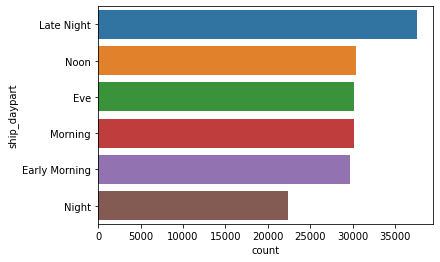

In [41]:
sns.countplot(y='ship_daypart', data = data_raw, order = data_raw['ship_daypart'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='order_daypart'>

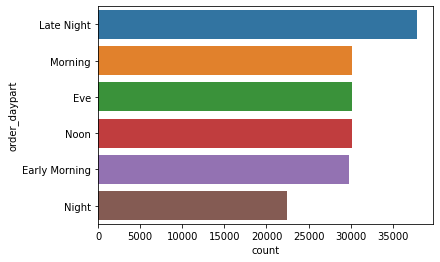

In [42]:
sns.countplot(y='order_daypart', data = data_raw, order = data_raw['order_daypart'].value_counts().index)

In [43]:
# Dropping uninformative categorical variables
data_raw.drop(['Delivery Status', 'Customer Segment', 
           'order date (DateOrders)', 'Order Status',
           'shipping date (DateOrders)', 'ship_day_of_week_name',
           'order_day_of_week_name', 'ship_daypart', 'order_daypart',
           ], axis=1, inplace=True)

3. Encodings

In [44]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Late_delivery_risk             180519 non-null  int64  
 5   Order Item Discount            180519 non-null  float64
 6   Order Item Discount Rate       180519 non-null  float64
 7   Order Item Product Price       180519 non-null  float64
 8   Order Item Profit Ratio        180519 non-null  float64
 9   Order Item Quantity            180519 non-null  int64  
 10  Sales                          180519 non-null  float64
 11  Order Item Total               180519 non-null  float64
 12  Order Profit Per Order        

In [45]:
ohe_data.shape

(180519, 29)

In [46]:
# Numerical variables
ohe_data.select_dtypes(include = ["float"])

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price
0,91.250000,314.640015,13.110000,0.04,327.750000,0.29,327.750000,314.640015,91.250000,327.750000
1,-249.089996,311.359985,16.389999,0.05,327.750000,-0.80,327.750000,311.359985,-249.089996,327.750000
2,-247.779999,309.720001,18.030001,0.06,327.750000,-0.80,327.750000,309.720001,-247.779999,327.750000
3,22.860001,304.809998,22.940001,0.07,327.750000,0.08,327.750000,304.809998,22.860001,327.750000
4,134.210007,298.250000,29.500000,0.09,327.750000,0.45,327.750000,298.250000,134.210007,327.750000
...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,0.000000,0.00,399.980011,0.10,399.980011,399.980011,40.000000,399.980011
180515,-613.770019,395.980011,4.000000,0.01,399.980011,-1.55,399.980011,395.980011,-613.770019,399.980011
180516,141.110001,391.980011,8.000000,0.02,399.980011,0.36,399.980011,391.980011,141.110001,399.980011
180517,186.229996,387.980011,12.000000,0.03,399.980011,0.48,399.980011,387.980011,186.229996,399.980011


4. Detect / Remove / Replace Outliers (if any)

In [47]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<AxesSubplot:xlabel='value', ylabel='variable'>

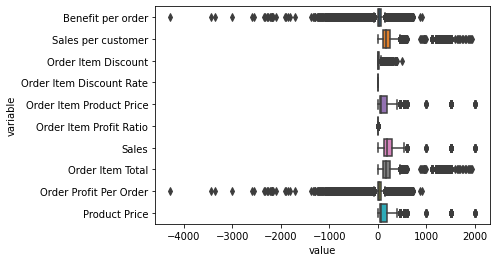

In [48]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [49]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [50]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [51]:
# Removing outliers and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr

In [52]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include=["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<AxesSubplot:xlabel='value', ylabel='variable'>

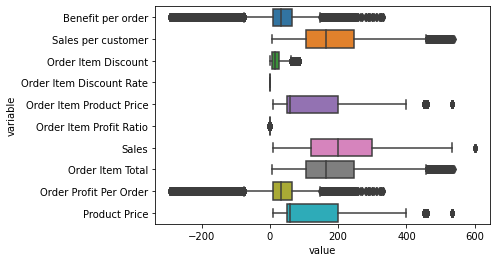

In [53]:
sns.boxplot(y = 'variable', x = 'value', data = data_melted)
# compare this boxplot with the previous one and you should verify that outliers are indeed removed and replaced with median.

5. Scaling the features (recall that some models suffer from unscaled features)

In [54]:
ohe_data.select_dtypes(include = ["float"])

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price
0,91.250000,314.640015,13.110000,0.04,327.750000,0.29,327.750000,314.640015,91.250000,327.750000
1,-249.089996,311.359985,16.389999,0.05,327.750000,-0.80,327.750000,311.359985,-249.089996,327.750000
2,-247.779999,309.720001,18.030001,0.06,327.750000,-0.80,327.750000,309.720001,-247.779999,327.750000
3,22.860001,304.809998,22.940001,0.07,327.750000,0.08,327.750000,304.809998,22.860001,327.750000
4,134.210007,298.250000,29.500000,0.09,327.750000,0.45,327.750000,298.250000,134.210007,327.750000
...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,0.000000,0.00,399.980011,0.10,399.980011,399.980011,40.000000,399.980011
180515,31.520000,395.980011,4.000000,0.01,399.980011,0.27,399.980011,395.980011,31.520000,399.980011
180516,141.110001,391.980011,8.000000,0.02,399.980011,0.36,399.980011,391.980011,141.110001,399.980011
180517,186.229996,387.980011,12.000000,0.03,399.980011,0.48,399.980011,387.980011,186.229996,399.980011


In [55]:
scaler = MinMaxScaler()
scaler.fit(ohe_data.select_dtypes(include = ["float"]))
scaled_features = scaler.transform(ohe_data.select_dtypes(include = ["float"]))
df_MinMax = pd.DataFrame(data = scaled_features, columns = ohe_data.select_dtypes(include = ["float"]).columns)

In [56]:
data1 = ohe_data.select_dtypes(exclude = ["float"])
data = pd.concat([data1, df_MinMax], axis = 1)
data = data.drop(['Days for shipping (real)'], axis = 1)
data

,Days for shipment (scheduled),Late_delivery_risk,Order Item Quantity,diff(hours),ship_day_of_week,order_day_of_week,ship_hour,order_hour,ship_daypart_n,order_daypart_n,...,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Product Price
0,4,0,1,72,5,2,22,22,4,4,...,0.614174,0.576808,0.153351,0.16,0.608048,0.880000,0.538576,0.576808,0.614174,0.608048
1,4,1,1,120,3,5,12,12,1,1,...,0.067610,0.570648,0.191718,0.20,0.608048,0.257143,0.538576,0.570648,0.067610,0.608048
2,4,0,1,96,2,5,12,12,1,1,...,0.069714,0.567568,0.210902,0.24,0.608048,0.257143,0.538576,0.567568,0.069714,0.608048
3,4,0,1,72,1,5,11,11,1,1,...,0.504344,0.558347,0.268335,0.28,0.608048,0.760000,0.538576,0.558347,0.504344,0.608048
4,4,0,1,48,0,5,11,11,1,1,...,0.683165,0.546028,0.345070,0.36,0.608048,0.971429,0.538576,0.546028,0.683165,0.608048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,0,1,96,2,5,3,3,5,5,...,0.531870,0.737070,0.000000,0.00,0.746264,0.771429,0.661000,0.737070,0.531870,0.746264
180515,2,1,1,72,1,5,1,1,5,5,...,0.518251,0.729559,0.046789,0.04,0.746264,0.868571,0.661000,0.729559,0.518251,0.746264
180516,4,1,1,120,2,4,21,21,4,4,...,0.694246,0.722047,0.093578,0.08,0.746264,0.920000,0.661000,0.722047,0.694246,0.746264
180517,4,0,1,72,0,4,20,20,3,3,...,0.766706,0.714535,0.140367,0.12,0.746264,0.988571,0.661000,0.714535,0.766706,0.746264


6. Modeling (SVM)

In [57]:
# data
X = data.drop('Late_delivery_risk', axis=1)
y = data['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (144415, 27)
Shape of X_test (36104, 27)
Shape of y_train (144415,)
Shape of y_test (36104,)


In [58]:
# model
# Initialize SVM with probability estimates
svm_classifier = SVC(kernel = 'linear', probability = True, random_state = 0) 
### you will need "probability = True" because you need P(Y|X) to compute the premium using equivalence principle

# Fit the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [59]:
# Predict class labels and probabilities
y_pred = svm_classifier.predict(X_test)
y_prob = svm_classifier.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9743


In [60]:
# Designing pricing algorithm

# Get probability estimates for the training data
train_probabilities = svm_classifier.predict_proba(X_train)

# Extract probabilities of class '1'
prob_class_1 = train_probabilities[:, 1]

# Premium / expected loss for each observation (recall the equivalence principle)
premium = prob_class_1 * 100

# Aggregated loss / expected loss 
agg_premium = np.sum(premium)
print(f'Aggregated premium: {agg_premium}')

# Aggregated fixed expense
agg_expense = X_train.shape[0] * 10
print(f'Aggregated expense: {agg_expense}')

# Actual number of claims
num_claims = np.sum(y_train == 1)

# Actual loss
agg_loss = num_claims * 100
print(f'Actual aggregated loss: {agg_loss}')

# Gross profit
total_cost = agg_loss + agg_expense
gross_profit = (agg_premium - total_cost) / total_cost

# Although we are targeting 5% overall profit, we need to give a little bit of room for numerical computation.
if (gross_profit < 0.045):
    print(f'Gross profit: {gross_profit}, too low, need adjustment!')
if (gross_profit > 0.055): 
    print(f'Gross profit: {gross_profit}, too high, need adjustment!')
if ((gross_profit > 0.045) & (gross_profit < 0.055)):
    print(f'Gross profit: {gross_profit}, within the target range!')

# Adjust premium
target_premium = total_cost * 1.05
adjust_factor = target_premium / agg_premium
print(f'need to scale current premium by {adjust_factor}')

Aggregated premium: 7935298.143020967
Aggregated expense: 1444150
Actual aggregated loss: 7925700
Gross profit: -0.15310296930890388, too low, need adjustment!
need to scale current premium by 1.2398201457185003


In [61]:
# Final pricing algorithm
def pricing_alg(adjust_factor, data):
    test_probabilities = svm_classifier.predict_proba(data)
    prob_class_1 = test_probabilities[:, 1]
    # Adjusted premium
    premium = prob_class_1 * 100 * adjust_factor

    # Adjusted aggregate premium
    agg_premium = np.sum(premium)

    return agg_premium    

# Test the performance of our final pricing algorithm
def test_alg(target_profit_load, fixed_expense_load, data_X, data_y):
    # Aggregate fixed expense
    agg_fixed_expense = fixed_expense_load * data_X.shape[0]
    print(f'Aggregated fixed expense: {agg_fixed_expense}')

    # Aggregate loss
    agg_loss = (np.sum(data_y == 1)) * 100
    print(f'Aggregated loss: {agg_loss}')

    # Total cost
    total_cost = agg_expense + agg_loss
    print(f'Total cost: {total_cost}')

    # Aggregate adjusted premium
    agg_premium = pricing_alg(adjust_factor = adjust_factor, data = data_X)
    print(f'Aggregated premium: {agg_premium}')
    
    # test
    actual_profit_load = (agg_premium - total_cost) / total_cost

    if (actual_profit_load < 0):
        print(f'actual profit: {actual_profit_load}, insolvent :(')
    if ((actual_profit_load > 0) & (actual_profit_load < target_profit_load - 0.005)):
        print(f'actual profit: {actual_profit_load}, made some profit :|')
    if ((actual_profit_load > target_profit_load - 0.005) & (actual_profit_load < target_profit_load + 0.005)):
        print(f'actual profit: {actual_profit_load}, at the sustainable sweet spot :)')
    if (actual_profit_load > target_profit_load + 0.005):
        print(f'actual profit: {actual_profit_load}, lose competitivity, greed kills, and DOI will not approve :(')

test_alg(target_profit_load = 0.05, fixed_expense_load = 10, data_X = X_test, data_y = y_test)

Aggregated fixed expense: 361040
Aggregated loss: 1972000
Total cost: 3416150
Aggregated premium: 2452525.7669264465
actual profit: -0.2820790167508902, insolvent :(
